In [1]:
import glob
import os
import cv2
import glob
import importlib
import h5py
import json
import copy
import traceback
import _pickle as pkl
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl

In [2]:
import scipy.stats as spstats
import analyze2p.utils as hutils
import analyze2p.plotting as pplot
import analyze2p.receptive_fields.utils as rfutils
import analyze2p.aggregate_datasets as aggr
import analyze2p.scatter as sct
import analyze2p.retinotopy.segment as seg

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
rootdir = '/n/coxfs01/2p-data'
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'
# Plotting
pplot.set_plot_params()
visual_areas, area_colors = pplot.set_threecolor_palette()

In [65]:
# Receptive Field settings
traceid='traces001'
response_type='dff'
do_spherical_correction=True
is_neuropil = False
# ---------------------------------------------------
fit_desc = rfutils.get_fit_desc(response_type=response_type,
                               do_spherical_correction=do_spherical_correction)
data_id = '%s|%s' % (traceid, fit_desc)
data_id

'traces001|fit-2dgaus_dff_sphr'

In [66]:
# output dir
rf_str = 'sphr_corrected' if do_spherical_correction else ''
dst_dir = os.path.join(aggregate_dir, 'receptive-fields', 'scatter/%s' % rf_str)
print(dst_dir)
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)
    
FIGDIR = os.path.join(aggregate_dir, 'FIGURES', 'retinotopy/%s' % rf_str)
print(FIGDIR)
if not os.path.exists(FIGDIR):
    os.makedirs(FIGDIR)
    

/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/scatter/sphr_corrected
/n/coxfs01/julianarhee/aggregate-visual-areas/FIGURES/retinotopy/sphr_corrected


In [67]:
# Meta data
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
meta = sdata[sdata.experiment.isin(['rfs', 'rfs10'])].copy()

/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 12 dsets


In [68]:
rfdf = rfutils.aggregate_fits(cells0, meta, combine='single', 
                              response_type=response_type,
                              do_spherical_correction=do_spherical_correction,
                              reliable_only=True,
                              pass_criterion='position')
rfdf = aggr.add_roi_positions(rfdf)

N dpaths: 56, N unfit: 0
N datasets included: 61, N sessions excluded: 4


# Aggregate deviants

In [69]:
# importlib.reload(sct)

In [70]:
rf_fit_desc = rfutils.get_fit_desc(response_type=response_type,
                             do_spherical_correction=do_spherical_correction)
deviants, no_deviants = sct.aggregate_deviant_cells(response_type=response_type,
                             do_spherical_correction=do_spherical_correction, 
                             meta=meta, traceid=traceid, 
                             create_new=True, redo_fov=False, save_plots=False)
                             #create_new=False, redo_fov=False, save_plots=False)
for n in no_deviants:
    print(n)

('Li', '20190522_JC089_fov1', 'rfs')
('Li', '20190522_JC089_fov1', 'rfs10')
('Li', '20191017_JC113_fov1', 'rfs')
('Li', '20191018_JC113_fov1', 'rfs10')
('Li', '20191111_JC120_fov1', 'rfs10')
('Lm', '20190509_JC078_fov1', 'rfs')
('Lm', '20190627_JC091_fov1', 'rfs')
('Lm', '20191111_JC117_fov2', 'rfs10')
('Lm', '20191111_JC120_fov1', 'rfs10')
('V1', '20190504_JC078_fov1', 'rfs')
('V1', '20190509_JC078_fov1', 'rfs')
('V1', '20190512_JC083_fov1', 'rfs')
('V1', '20190517_JC083_fov1', 'rfs')


In [71]:
deviants.columns

Index(['deviants', 'axis', 'visual_area', 'datakey', 'experiment'], dtype='object')

In [72]:
for (va, dk), g in meta.groupby(['visual_area', 'datakey']):
    if deviants.query('@va==visual_area and @dk==datakey').empty:
        print(va, dk)

Li 20190522_JC089_fov1
Li 20191018_JC113_fov1
Li 20191111_JC120_fov1
Lm 20190509_JC078_fov1
Lm 20190627_JC091_fov1
Lm 20191111_JC117_fov2
Lm 20191111_JC120_fov1
V1 20190504_JC078_fov1
V1 20190509_JC078_fov1
V1 20190512_JC083_fov1
V1 20190517_JC083_fov1


In [73]:
importlib.reload(sct)

<module 'analyze2p.scatter' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/scatter.py'>

In [74]:
# dk='20190509_JC078_fov1'
# va='Lm'
# exp='rfs'
# df0 = sct.do_scatter_analysis(dk, va, experiment=exp, 
#                                 do_gradients=True, do_model=True)

In [75]:
# df0 = sct.load_scatter_results(dk, va, exp, verbose=False)
# df0['reliable']


# Load all results from scatter analysis

In [76]:
excl_v1 =['20190420_JC076_fov1', '20190504_JC078_fov1', '20190508_JC083_fov1', 
          '20190512_JC083_fov1', '20190517_JC083_fov1']
excl_lm = ['20190423_JC076_fov1']
excl_li = ['20190522_JC089_fov1']
exclude = {'V1': excl_v1,
           'Lm':excl_lm,
           'Li': excl_li}

# exclude = dict((k, []) for k in visual_areas)

... ignore 20190522_JC089_fov1 (Li)
... ignore 20190522_JC089_fov1 (Li)
Do model? False
... loading gradient vectors (20191111_JC120_fov1, Lm)
    found: 20191111_JC120_fov1, Lm dict_keys(['Li', 'Lm'])
    found: 20191111_JC120_fov1, Lm dict_keys(['Li', 'Lm'])


<IPython.core.display.Javascript object>


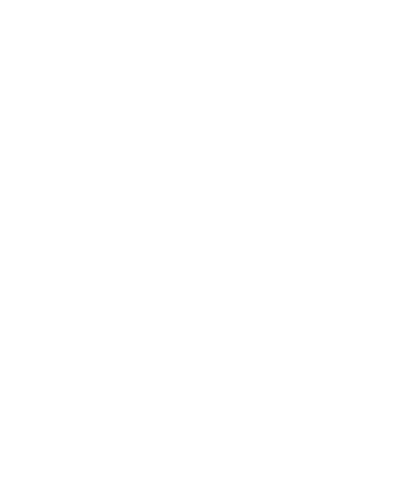

    calculating scatter. saves to:
/n/coxfs01/2p-data/JC120/20191111/FOV1_zoom2p0x/segmentation/scatter_rfs10_sphrcorr
ERROR: no rfs
... ignore 20190504_JC078_fov1 (V1)
... ignore 20190508_JC083_fov1 (V1)
Do model? False
... loading gradient vectors (20190509_JC078_fov1, V1)
    found: 20190509_JC078_fov1, V1 dict_keys(['Lm', 'V1'])
    found: 20190509_JC078_fov1, V1 dict_keys(['Lm', 'V1'])


<IPython.core.display.Javascript object>


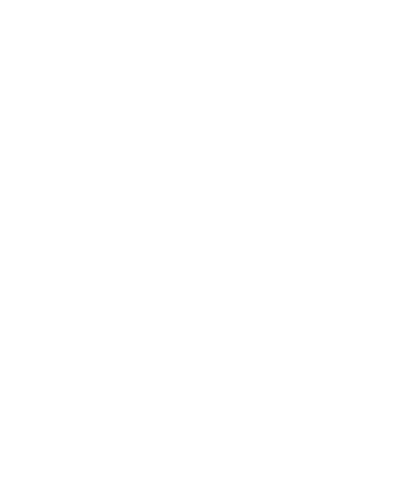

    calculating scatter. saves to:
/n/coxfs01/2p-data/JC078/20190509/FOV1_zoom2p0x/segmentation/scatter_rfs_sphrcorr
ERROR: no rfs
... ignore 20190512_JC083_fov1 (V1)
... ignore 20190517_JC083_fov1 (V1)
Missing 0 datasets:


In [82]:
missing_scatter_files=[]
d_list=[]
no_eval=[]
for (va, dk, exp), g in meta.groupby(['visual_area', 'datakey', 'experiment']):
    if dk in exclude[va]:
        print("... ignore %s (%s)" % (dk, va)) # dk)
        continue
    # Load scatter calculations
    df0 = sct.load_scatter_results(dk, va, experiment=exp,
                                   do_spherical_correction=do_spherical_correction,
                                   verbose=False)
    #df0=None
    if df0 is None:
        try:
            df0 = sct.do_scatter_analysis(dk, va, experiment=exp, 
                                do_spherical_correction=do_spherical_correction,
                                create_new=True,
                                do_gradients=False, do_model=False)
            assert df_ is not None
        except Exception as e:
            traceback.print_exc()
            missing_scatter_files.append((va, dk, exp))
            continue
    if df0 is None:
        continue
    df_ = df0.copy() 
    # Get deviant or not
    curr_deviants = deviants[(deviants.visual_area==va) 
                          & (deviants.datakey==dk)].copy()
    df_['deviant'] = False
    for dev_cond, dev_vals in curr_deviants.groupby(['axis']):
        dev_rois = dev_vals['deviants'].values
        df_.loc[(df_.axis==dev_cond) \
                & (df_['cell'].isin(dev_rois)), 'deviant'] = True
    df_['visual_area'] = va
    df_['datakey'] = dk
    df_['experiment'] = exp
    d_list.append(df_)
scatterdf = pd.concat(d_list, axis=0)
scatterdf.shape
print("Missing %i datasets:" % (len(missing_scatter_files)))
for m in missing_scatter_files:
    print(m)

In [83]:
scatterdf['deg_scatter'] = scatterdf['deg_scatter'].abs()
scatterdf['dist_scatter'] = scatterdf['dist_scatter'].abs()

In [84]:
scatterdf[scatterdf.reliable].groupby(['visual_area', 'experiment']).count()

datakey  cell    r2  theta  offset  amplitude  \
visual_area experiment                                                  
Li          rfs              88    88    88     88      88         88   
            rfs10           886   886   886    886     886        886   
Lm          rfs             588   588   588    588     588        588   
            rfs10            68    68    68     68      68         68   
V1          rfs            1080  1080  1080   1080    1080       1080   
            rfs10           922   922   922    922     922        922   

                        aniso_index  ratio_xy  major_axis  minor_axis  ...  \
visual_area experiment                                                 ...   
Li          rfs                  88        88          88          88  ...   
            rfs10               886       886         886         886  ...   
Lm          rfs                 588       588         588         588  ...   
            rfs10                68        68          68          68  ...   
V1          rfs                1080      1080        1080        1080  ...   
            rfs10               922       922         922         922  ...   

                        vectorproj  ctx_pos  ctx_proj  predicted_ctx_proj  \
visual_area experiment                                                      
Li          rfs                 88       88        88                  88   
            rfs10              886      886       886                 886   
Lm          rfs                588      588       588                 588   
            rfs10               68       68        68                  68   
V1          rfs               1080     1080      1080                1080   
            rfs10              922      922       922                 922   

                        predicted_rf_pos  predicted_ctx_pos  deg_scatter  \
visual_area experiment                                                     
Li          rfs                       88                 88           88   
            rfs10                    886                886          886   
Lm          rfs                      588                588          588   
            rfs10                     68                 68           68   
V1          rfs                     1080               1080         1080   
            rfs10                    922                922          922   

                        dist_scatter  axis  deviant  
visual_area experiment                               
Li          rfs                   88    88       88  
            rfs10                886   886      886  
Lm          rfs                  588   588      588  
            rfs10                 68    68       68  
V1          rfs                 1080  1080     1080  
            rfs10                922   922      922  

[6 rows x 30 columns]

## Load REGR for retino gradients

In [85]:
r_=[]
for (va, dk), g in meta.groupby(['visual_area', 'datakey']):
    if dk in exclude[va]:
        continue
    regr_ = sct.load_models(dk, va, return_best=False)
    regr_['visual_area'] = va
    regr_['datakey'] = dk
    r_.append(regr_)
REGR = pd.concat(r_, axis=0)

In [86]:
# Only get ones that pass 
r2_thr=0.5
pass_regr = pd.concat([r for (va, dk), r in REGR.groupby(['visual_area', 'datakey'])\
                       if (r[r.cond=='az']['R2'].values[0]>r2_thr)
                       and (r[r.cond=='el']['R2'].values[0]>r2_thr)])
#### Only include dataset if gradient was well-fit
scatter_pass_regr = pd.concat([g for (va, dk), g in scatterdf[scatterdf['reliable']]\
                    .groupby(['visual_area', 'datakey'])\
           if not pass_regr.query('@va==visual_area and @dk==datakey').empty])\
            .reset_index(drop=True)
# Only get ones that pass 
REGR.shape, pass_regr.shape

((86, 10), (84, 10))

In [87]:
REGR[REGR['R2']<r2_thr]

,R2,RMSE,pearson_p,pearson_r,coefficient,intercept,cond,aligned,visual_area,datakey
0,0.318277,5.233984,0.0,0.56416,0.023876,-18.348327,az,True,Li,20191012_JC113_fov2


<IPython.core.display.Javascript object>


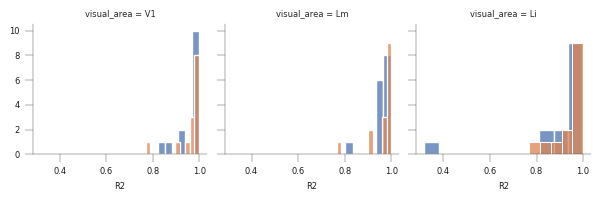

In [88]:
%matplotlib notebook
fg = sns.FacetGrid(REGR, col='visual_area', col_order=visual_areas, 
                  hue='cond', height=2)
fg.map(sns.histplot, 'R2')

In [89]:
scatter_pass_regr['n_cells'] = None
for (va, dk, exp), g in scatter_pass_regr.groupby(['visual_area', 'datakey', 'experiment']):
    n_cells = len(g['cell'].unique())
    scatter_pass_regr.loc[g.index, 'n_cells'] = n_cells

In [90]:
scatter_pass_regr[(scatter_pass_regr.reliable) & (scatter_pass_regr['dist_scatter']>1200)]

,experiment,visual_area,datakey,cell,r2,theta,offset,amplitude,aniso_index,ratio_xy,...,ctx_pos,ctx_proj,predicted_ctx_proj,predicted_rf_pos,predicted_ctx_pos,deg_scatter,dist_scatter,axis,deviant,n_cells
1601,rfs10,Lm,20191111_JC117_fov2,41,0.552058,5.821486,-0.002820,0.042167,0.218840,0.566411,...,725.917808,798.300220,3109.091679,8.821494,3393.716325,14.186073,2310.791459,el,False,5
1603,rfs10,Lm,20191111_JC117_fov2,60,0.507991,0.974257,0.005496,-0.073066,0.015841,0.772735,...,647.564775,708.754921,4991.055017,8.271770,5611.176939,26.289271,4282.300097,el,False,5
1604,rfs10,Lm,20191111_JC117_fov2,61,0.722967,6.210681,-0.001673,0.064998,-0.413597,2.873512,...,619.910763,688.720025,-1120.449203,8.148775,-1649.969250,11.106587,1809.169228,el,False,5
1605,rfs10,Lm,20191111_JC117_fov2,161,0.704311,5.040993,-0.003114,0.058682,-0.062921,0.698567,...,297.280626,621.479948,-951.944672,7.735984,-1726.881964,9.659339,1573.424620,el,False,5
1989,rfs,V1,20190522_JC084_fov1,36,0.817745,5.217708,-0.004906,0.082602,0.276534,2.168025,...,94.484540,548.190720,-1189.559007,-15.893235,-1955.764872,14.088755,1737.749727,el,False,116
1990,rfs,V1,20190522_JC084_fov1,38,0.844360,1.862003,0.004255,-0.054717,0.224981,1.651350,...,159.010568,557.045211,-1366.790012,-15.821447,-2002.111706,15.597438,1923.835223,el,True,116
2005,rfs,V1,20190522_JC084_fov1,70,0.867575,0.253503,-0.015480,0.581457,0.404724,0.396296,...,308.803131,585.593971,-1691.674577,-15.589989,-2270.323211,18.462888,2277.268548,el,True,116
2009,rfs,V1,20190522_JC084_fov1,76,0.796724,0.343924,-0.002927,0.156443,-0.035704,1.246300,...,188.969080,438.715401,-1166.612803,-16.780803,-1572.495117,13.015151,1605.328205,el,False,116
2060,rfs,V1,20190522_JC084_fov1,187,0.668820,3.454348,0.001927,-0.025510,0.175891,0.673935,...,221.232094,321.370899,-1319.799663,-17.732170,-1578.967046,13.305742,1641.170561,el,False,116
2061,rfs,V1,20190522_JC084_fov1,188,0.738222,0.180038,-0.004582,0.052792,0.200021,0.657409,...,200.491585,318.419169,-899.882450,-17.756101,-1126.758111,9.877345,1218.301619,el,False,116


In [91]:
scatter_counts = aggr.count_n_cells(scatter_pass_regr, 
            count_cols=['visual_area', 'datakey', 'experiment', 'axis', 'cell'])
scatter_counts.groupby(['visual_area', 'experiment', 'axis']).sum()

n_cells
visual_area experiment axis         
Li          rfs        az         44
                       el         44
            rfs10      az        431
                       el        431
Lm          rfs        az        294
                       el        294
            rfs10      az         34
                       el         34
V1          rfs        az        540
                       el        540
            rfs10      az        461
                       el        461

<IPython.core.display.Javascript object>


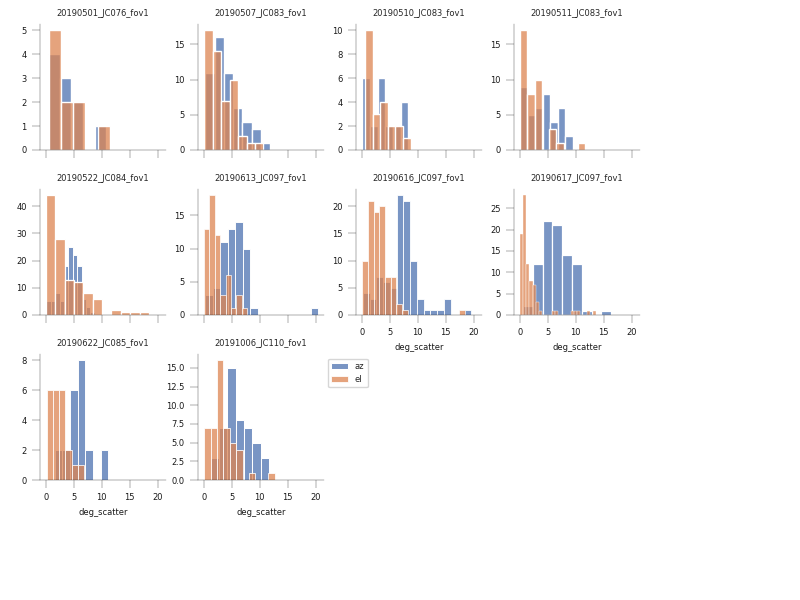

In [92]:
%matplotlib notebook
sns.set(font_scale = 0.75, style='ticks')
pplot.set_plot_params()
# mpl.style.use('classic')

plotd = scatter_pass_regr[(scatter_pass_regr.visual_area=='V1')
                         & (scatter_pass_regr.experiment=='rfs')].copy()
fg = sns.FacetGrid(data=plotd, col='datakey', col_wrap=4,
                   hue='axis', height=2, sharey=False)
fg.map(sns.histplot, 'deg_scatter')
fg.set_titles('{col_name}')

pl.legend(bbox_to_anchor=(1,1), loc='upper left')
pl.subplots_adjust(left=0.05, right=0.8, bottom=0.2)

<IPython.core.display.Javascript object>


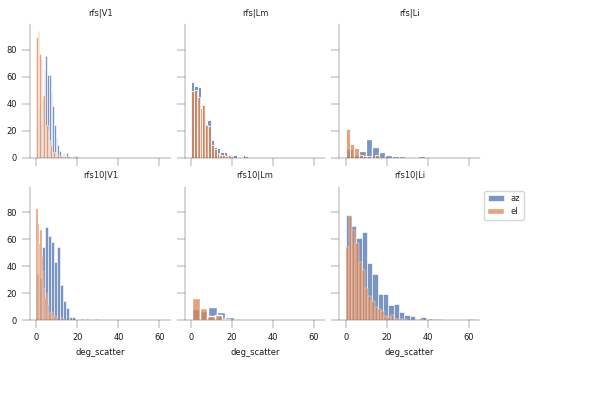

<IPython.core.display.Javascript object>


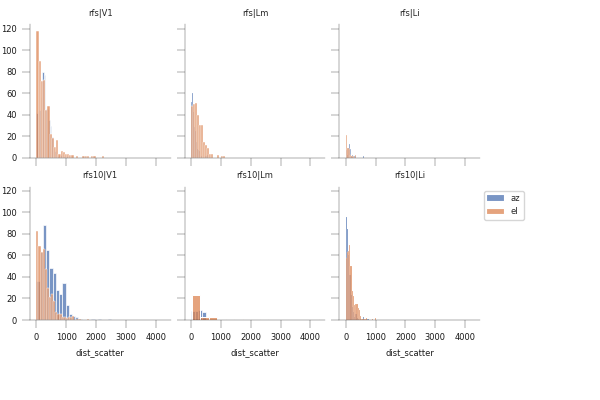

In [93]:
%matplotlib notebook
sns.set(font_scale = 0.75, style='ticks')
pplot.set_plot_params()
fg = sns.FacetGrid(data=scatter_pass_regr, col='visual_area', col_order=visual_areas,
                   hue='axis', row='experiment', row_order=['rfs', 'rfs10'], 
                   height=2)
fg.map(sns.histplot, 'deg_scatter')
fg.set_titles('{row_name}|{col_name}')
pl.legend(bbox_to_anchor=(1,1), loc='upper left')
pl.subplots_adjust(left=0.05, right=0.8, bottom=0.2)

fg = sns.FacetGrid(data=scatter_pass_regr, col='visual_area', col_order=visual_areas,
                   hue='axis', row='experiment', row_order=['rfs', 'rfs10'], 
                   height=2)
fg.map(sns.histplot, 'dist_scatter')
fg.set_titles('{row_name}|{col_name}')
pl.legend(bbox_to_anchor=(1,1), loc='upper left')
pl.subplots_adjust(left=0.05, right=0.8, bottom=0.2)


In [94]:
scatter_pass_regr[scatter_pass_regr['dist_scatter']>1200].shape

(29, 33)

In [95]:
scatter_pass_regr[(scatter_pass_regr['dist_scatter']>1200)
                 & (scatter_pass_regr.visual_area=='V1')
                 & (scatter_pass_regr.experiment=='rfs')]

,experiment,visual_area,datakey,cell,r2,theta,offset,amplitude,aniso_index,ratio_xy,...,ctx_pos,ctx_proj,predicted_ctx_proj,predicted_rf_pos,predicted_ctx_pos,deg_scatter,dist_scatter,axis,deviant,n_cells
1989,rfs,V1,20190522_JC084_fov1,36,0.817745,5.217708,-0.004906,0.082602,0.276534,2.168025,...,94.484540,548.190720,-1189.559007,-15.893235,-1955.764872,14.088755,1737.749727,el,False,116
1990,rfs,V1,20190522_JC084_fov1,38,0.844360,1.862003,0.004255,-0.054717,0.224981,1.651350,...,159.010568,557.045211,-1366.790012,-15.821447,-2002.111706,15.597438,1923.835223,el,True,116
2005,rfs,V1,20190522_JC084_fov1,70,0.867575,0.253503,-0.015480,0.581457,0.404724,0.396296,...,308.803131,585.593971,-1691.674577,-15.589989,-2270.323211,18.462888,2277.268548,el,True,116
2009,rfs,V1,20190522_JC084_fov1,76,0.796724,0.343924,-0.002927,0.156443,-0.035704,1.246300,...,188.969080,438.715401,-1166.612803,-16.780803,-1572.495117,13.015151,1605.328205,el,False,116
2060,rfs,V1,20190522_JC084_fov1,187,0.668820,3.454348,0.001927,-0.025510,0.175891,0.673935,...,221.232094,321.370899,-1319.799663,-17.732170,-1578.967046,13.305742,1641.170561,el,False,116
2061,rfs,V1,20190522_JC084_fov1,188,0.738222,0.180038,-0.004582,0.052792,0.200021,0.657409,...,200.491585,318.419169,-899.882450,-17.756101,-1126.758111,9.877345,1218.301619,el,False,116
2625,rfs,V1,20190616_JC097_fov1,3,0.603273,3.372570,-0.004574,0.251659,-0.140333,1.698502,...,1050.852446,1072.079528,2923.760215,-6.361193,2938.509446,18.442251,1851.680687,el,True,88
3457,rfs,V1,20191006_JC110_fov1,232,0.522204,0.361453,-0.002378,0.052657,0.071604,0.848035,...,693.654795,804.353142,2129.260671,-3.486162,2298.573857,12.662911,1324.907528,el,True,48


### Count fraction deviant per site

In [96]:
count_cols=['visual_area', 'datakey', 'experiment', 'cell']
fit_ = aggr.count_n_cells(scatterdf, name='fit', count_cols=count_cols, reset_index=False)
reliable_ = aggr.count_n_cells(scatterdf[scatterdf['reliable']], name='reliable', 
                               count_cols=count_cols, reset_index=False)
deviants_ = aggr.count_n_cells(scatterdf[scatterdf['deviant']], name='deviant', 
                              count_cols=count_cols, reset_index=False) 
# Get counts
counts0 = fit_.merge(reliable_, left_index=True, right_index=True, how='outer')
count_dev = counts0.merge(deviants_, left_index=True, right_index=True, how='outer')
count_dev = count_dev.fillna(value=0).reset_index()
count_dev['fraction_reliable'] = count_dev['reliable']/count_dev['fit'].astype(float)
count_dev['fraction_deviant'] = count_dev['deviant']/count_dev['fit'].astype(float)

<IPython.core.display.Javascript object>


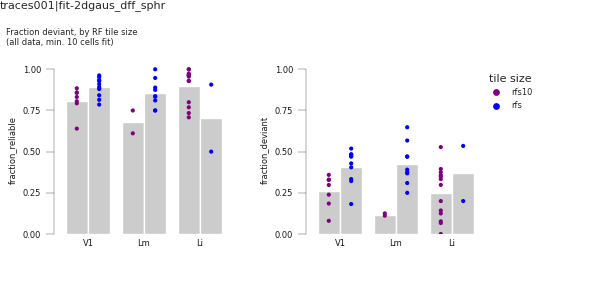

/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/scatter/sphr_corrected fraction_deviant_alldata


In [97]:
%matplotlib notebook
sns.set(font_scale = 0.75, style='ticks')
pplot.set_plot_params()

ymax=1
exp_colors={'rfs': 'blue', 'rfs10': 'purple'}

min_ncells_fit=10
plotdf = count_dev[count_dev['fit']>=min_ncells_fit].copy()

fig, axn = pl.subplots(1, 2, figsize=(6,3))
fig.set_facecolor('1')
for ai, (ax, frac) in enumerate(zip(axn.flat,
                                    ['fraction_reliable', 'fraction_deviant'])):
    sns.stripplot(x='visual_area', y=frac, data=plotdf, ax=ax,
                  hue='experiment', palette=exp_colors, dodge=True, 
                  order=visual_areas, jitter=False,size=3)
    sns.barplot(x='visual_area', y=frac, data=plotdf, ax=ax,
                  hue='experiment', palette={'rfs': [0.8]*3, 'rfs10': [0.8]*3}, 
                  edgecolor='w',ci=None, order=visual_areas)
    if ai==1:
        pplot.crop_legend_labels(ax, 2,start_ix=0, bbox_to_anchor=(1, 1), 
                loc='upper left', fontsize=6, title='tile size', markerscale=0.5)
    else:
        ax.legend_.remove()
    ax.set_box_aspect(1)
    ax.set_yticks(np.linspace(0,ymax, 5))
    ax.set_ylim([0, ymax+0.02])
    ax.set_xlabel('')
    ax.tick_params(which='both', axis='x', size=0)
sns.despine(bottom=True, offset=4, trim=True)
pl.subplots_adjust(left=0.1, right=0.8, bottom=0.2, top=0.8, wspace=0.5)

pplot.label_figure(fig, data_id)
fig.text(0.01, 0.85, "Fraction deviant, by RF tile size\n(all data, min. %i cells fit)" \
             % min_ncells_fit)

figname = 'fraction_deviant_alldata' 
pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
print(dst_dir, figname)

In [98]:
dst_dir

'/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/scatter/sphr_corrected'

## Get unique datasets

In [99]:
import analyze2p.stats as pstats

In [100]:
bw_colors=dict((v, [0.7]*3) for v in visual_areas)
axis_colors={'az': [0.7]*3,
             'el': [0.5]*3}
exp_colors={'rfs':'blue', 'rfs10': 'purple'}

#### 1 experiment per fov only

In [101]:
min_ncells = 5
f_=[]
for (va, dk), g in scatter_pass_regr[scatter_pass_regr.reliable].groupby(['visual_area', 'datakey']):
#     if va=='Lm' and dk in['20190430_JC078_fov1', '20190508_JC083_fov1']:
#         continue
    df_ = None
    if va in ['V1', 'Lm']:
        if 'rfs' in g['experiment'].values:
            df_ = g[g.experiment=='rfs'].copy()
#         elif 'rfs10' in g['experiment'].values:
#             df_ = g[g.experiment=='rfs10'].copy()
    elif va=='Li':
        if 'rfs10' in g['experiment'].values:
            df_ = g[g.experiment=='rfs10'].copy()
#         elif 'rfs' in g['experiment'].values:
#             df_ = g[g.experiment=='rfs'].copy()
    if df_ is None:
        continue
    if len(df_['cell'].unique())<min_ncells:
        print("    too few cells: %s, %s (n=%i)" % (va, dk, len(df_['cell'].unique())))
        continue
    df_['n_cells'] = len(df_['cell'].unique())
    # passdf.loc[g.index, 'n_cells'] = len(g['cell'].unique())
    f_.append(df_)
scatter_regr = pd.concat(f_, axis=0, ignore_index=True)

    too few cells: Li, 20191111_JC120_fov1 (n=4)
    too few cells: Lm, 20190509_JC078_fov1 (n=3)


In [102]:
scatter_regr.groupby(['visual_area']).count()

,experiment,datakey,cell,r2,theta,offset,amplitude,aniso_index,ratio_xy,major_axis,...,ctx_pos,ctx_proj,predicted_ctx_proj,predicted_rf_pos,predicted_ctx_pos,deg_scatter,dist_scatter,axis,deviant,n_cells
visual_area,,,,,,,,,,,,,,,,,,,,,
Li,854,854,854,854,854,854,854,854,854,854,...,854,854,854,854,854,854,854,854,854,854
Lm,582,582,582,582,582,582,582,582,582,582,...,582,582,582,582,582,582,582,582,582,582
V1,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080


In [103]:
# drop duplicates
counts = aggr.count_n_cells(scatter_regr)
u_dkeys = aggr.drop_repeats(counts, colname='n_cells')

finaldf = pd.concat([g for (va, dk), g \
                     in scatter_regr.groupby(['visual_area', 'datakey'])\
                    if (va, dk) in u_dkeys])
print(scatter_regr.shape, finaldf.shape)

(2516, 33) (1918, 33)


In [104]:
scatter_regr.groupby(['visual_area'])['experiment'].unique()

visual_area
Li    [rfs10]
Lm      [rfs]
V1      [rfs]
Name: experiment, dtype: object

In [105]:
final_devs = pd.concat([g for (va, dk, r), g in scatter_regr[scatter_regr.deviant]\
                        .groupby(['visual_area', 'datakey', 'cell'])
            if 'az' in g['axis'].values and 'el' in g['axis'].values])


deg_scatter -----------------------
             count  mean   std   min   25%   50%    75%    max
visual_area                                                   
Li             8.0  7.94  3.20  3.65  5.54  7.43  10.91  12.42
Lm             7.0  6.25  2.59  2.65  4.76  5.95   7.76  10.08
V1             8.0  4.15  0.58  3.50  3.79  4.03   4.36   5.19
dist_scatter -----------------------
             count    mean    std     min     25%     50%     75%     max
visual_area                                                              
Li             8.0  160.21  74.00   90.37  102.22  137.21  205.61  293.88
Lm             7.0  193.91  64.88  129.88  144.78  161.71  239.41  297.43
V1             8.0  289.32  87.59  172.72  230.96  282.17  341.93  431.67


<IPython.core.display.Javascript object>


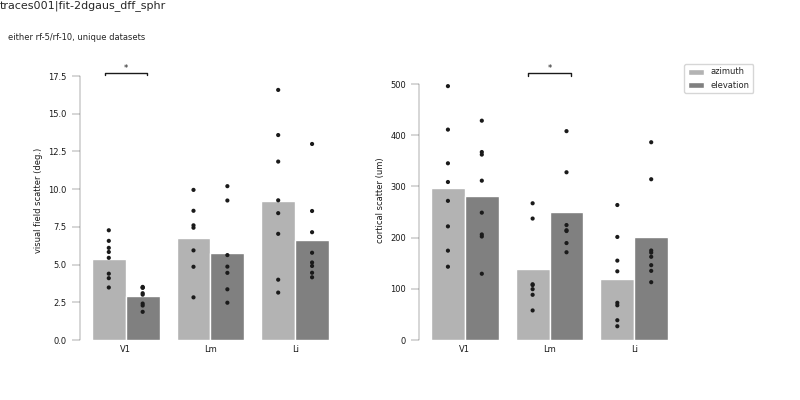

   t_stat     p_val visual_area       metric
0     1.0  0.015625          V1  deg_scatter
   t_stat    p_val visual_area        metric
1     1.0  0.03125          Lm  dist_scatter
/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/scatter/sphr_corrected scatter_perFOV_reliable


,t_stat,p_val,visual_area,metric
0,1.0,0.015625,V1,deg_scatter
1,4.0,0.109375,Lm,deg_scatter
2,7.0,0.148438,Li,deg_scatter
0,14.0,0.640625,V1,dist_scatter
1,1.0,0.031250,Lm,dist_scatter
2,4.0,0.054688,Li,dist_scatter


In [106]:
deviants_only=False
sns.set(font_scale = 0.75, style='ticks')
pplot.set_plot_params()

if deviants_only:
    plotd = final_devs.groupby(['visual_area', 'datakey', 'axis'])\
                                .mean().reset_index()
else:
    plotd = finaldf.groupby(['visual_area', 'datakey', 'axis'])\
                                .mean().reset_index()
for metric in ['deg_scatter', 'dist_scatter']:
    print('%s -----------------------' % metric)
    print(plotd.groupby(['visual_area','datakey']).mean().reset_index()\
               .groupby('visual_area')[metric].describe().round(2))
# plot
s_=[]
fig, axn = pl.subplots(1,2, figsize=(8, 4))
fig.patch.set_facecolor('w')
for ai, metric in enumerate(['deg_scatter', 'dist_scatter']):
    ax=axn[ai]
    sns.barplot(x='visual_area', y=metric, data=plotd, ax=ax,
              order=visual_areas, hue='axis', palette=axis_colors, ci=None)
    sns.stripplot(x='visual_area', y=metric, data=plotd, ax=ax,
              order=visual_areas, hue='axis', dodge=True,
              jitter=False, size=3,
              palette=dict((k, 'k') for k in ['az', 'el']))
    ylabel = 'cortical scatter (um)' if metric=='dist_scatter' \
                else 'visual field scatter (deg.)'
    ax.set_ylabel(ylabel)
    if metric=='dist_scatter':
        offset=20; h=5;
    else:
        offset=1; h=.1;
    # stats
    stats_ = pstats.paired_ttests(plotd, metric=metric, c1='az', c2='el',
                                        compare_var='axis', ttest=False)
    stats_['metric'] = metric
    s_.append(stats_)
    pplot.annotate_sig_on_paired_plot(ax, plotd, stats_, metric, offset=offset, h=h)
    ax.legend_.remove()
statdf = pd.concat(s_)
# custom legend
leg_h = pplot.custom_legend_markers(colors=[axis_colors['az'], axis_colors['el']],
                                   labels=['azimuth', 'elevation'],
                                    use_patch=True)
ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='upper left')

pl.subplots_adjust(left=0.1, right=0.85, wspace=0.3, bottom=0.15, top=0.85)
sns.despine(bottom=True, trim=True)
for ax in axn:
    ax.tick_params(which='both', axis='x', size=0)
    ax.set_xlabel('')

pplot.label_figure(fig, data_id)
fig.text(0.01, 0.9, 'either rf-5/rf-10, unique datasets')
    
plot_str = '_deviants' if deviants_only else ''
figname = 'scatter_perFOV_reliable%s' % plot_str
pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
print(dst_dir, figname)
statdf

<IPython.core.display.Javascript object>


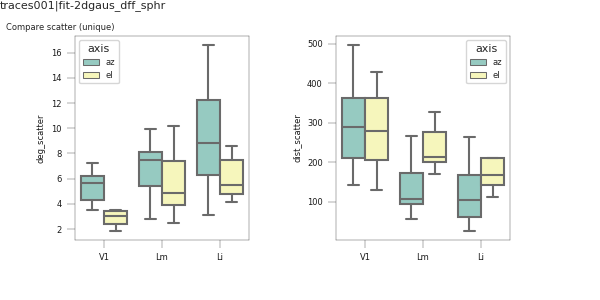

In [107]:
fig, axn = pl.subplots(1, 2, figsize=(6,3))
ax=axn[0]
sns.boxplot(x='visual_area', y='deg_scatter', hue='axis', data=plotd, 
            order=visual_areas, palette='Set3', fliersize=0, ax=ax)
ax=axn[1]
sns.boxplot(x='visual_area', y='dist_scatter', hue='axis', data=plotd, 
            order=visual_areas, palette='Set3', fliersize=0, ax=ax)
for ax in axn:
    ax.set_xlabel('')
pl.subplots_adjust(bottom=0.2, right=0.85, wspace=0.5)
fig.text(0.01, 0.9, 'Compare scatter (unique)')
pplot.label_figure(fig, data_id)


## Check paired

In [108]:
importlib.reload(pplot)
%matplotlib inline
# sns.set_style('white')
sns.reset_orig()# 'white')
# sns.set(font_scale = 0.8)
pplot.set_plot_params()

   t_stat  p_val visual_area       metric
0     1.0  0.016          V1  deg_scatter
   t_stat  p_val visual_area        metric
1     1.0  0.031          Lm  dist_scatter
|    |   t_stat |   p_val | visual_area   | metric       |
|---:|---------:|--------:|:--------------|:-------------|
|  0 |        1 |   0.016 | V1            | deg_scatter  |
|  1 |        4 |   0.109 | Lm            | deg_scatter  |
|  2 |        7 |   0.148 | Li            | deg_scatter  |
|  0 |       14 |   0.641 | V1            | dist_scatter |
|  1 |        1 |   0.031 | Lm            | dist_scatter |
|  2 |        4 |   0.055 | Li            | dist_scatter |


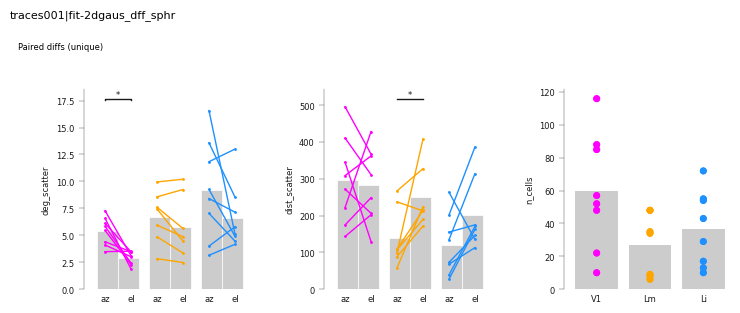

In [109]:
plotd = finaldf.groupby(['visual_area', 'datakey', 'axis']).mean().reset_index()

# Paired: spstats.wilcoxon()
offset=2
fig, axn = pl.subplots(1,3, figsize=(8, 4))
fig.patch.set_facecolor('w')

s_=[]
for ai, metric in enumerate(['deg_scatter', 'dist_scatter']):
    ax=axn[ai]
    ax, stats_ = pplot.pairwise_compare_single_metric(plotd, 
                 curr_metric=metric, ax=ax, size=1,
                 c1='az', c2='el', compare_var='axis', label_areas=False,
                 ttest=False, return_stats=True, bar_ci=None, 
                 facecolor=[0.8]*3, edgecolor='w')
    stats_['metric'] = metric
    if metric=='dist_scatter':
        offset=20; h=2;
    else:
        offset=1; h=.1;
    pplot.annotate_sig_on_paired_plot(ax, plotd, stats_, metric, offset=offset, h=h)
    s_.append(stats_)
    ax.set_xlabel('')
statsdf = pd.concat(s_)
print(statsdf.to_markdown())
fig.text(0.01, 0.9, 'Paired diffs (unique)')

ax=axn[-1]
countd_ = plotd[['visual_area', 'datakey', 'n_cells']].drop_duplicates()
sns.barplot(x='visual_area', y='n_cells', data=plotd, ax=ax,
            order=visual_areas, color=[0.8]*3, ci=None)
sns.stripplot(x='visual_area', y='n_cells', data=plotd, ax=ax,
            order=visual_areas, palette=area_colors, hue='visual_area',
              jitter=False, dodge=False)
ax.tick_params(which='both', axis='x', size=0)
ax.legend_.remove()
ax.set_xlabel('')

pl.subplots_adjust(left=0.1, right=0.9, wspace=0.5, bottom=0.3, top=0.8)

pplot.label_figure(fig, data_id)
figname = 'scatter_perFOV_paired_reliable_%s' % rf_str
pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))

pl.savefig(os.path.join(FIGDIR, '%s.svg' % figname))

In [110]:
dst_dir

'/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/scatter/sphr_corrected'

In [111]:
plotd[plotd.visual_area=='Li']

,visual_area,datakey,axis,cell,r2,theta,offset,amplitude,aniso_index,ratio_xy,...,vectorproj,ctx_pos,ctx_proj,predicted_ctx_proj,predicted_rf_pos,predicted_ctx_pos,deg_scatter,dist_scatter,deviant,n_cells
0,Li,20190527_JC092_fov3,az,74.139535,0.713875,3.111729,-0.001547,0.125682,-0.040925,1.330034,...,11.321075,437.899458,412.584980,409.365822,3.947035,429.612531,3.144470,26.878144,0.093023,43.0
1,Li,20190527_JC092_fov3,el,74.139535,0.713875,3.111729,-0.001547,0.125682,-0.040925,1.330034,...,5.819118,770.668002,548.252383,407.325903,-2.252060,615.093968,4.158163,162.601216,0.116279,43.0
2,Li,20190528_JC092_fov1,az,91.800000,0.784675,3.842217,-0.005796,0.114915,-0.050531,1.231274,...,13.722375,361.896830,278.866723,77.505522,17.477211,97.896151,13.589808,201.361201,0.100000,10.0
3,Li,20190528_JC092_fov1,el,91.800000,0.784675,3.842217,-0.005796,0.114915,-0.050531,1.231274,...,6.676516,861.883366,504.926142,118.535213,-6.217844,211.235292,8.554558,386.390929,0.000000,10.0
4,Li,20190607_JC091_fov1,az,207.072727,0.663255,3.218689,-0.002866,0.076812,-0.077707,1.566866,...,14.487924,427.471268,862.427289,831.107478,20.331821,489.557537,8.411285,72.693904,0.200000,55.0
5,Li,20190607_JC091_fov1,el,207.072727,0.663255,3.218689,-0.002866,0.076812,-0.077707,1.566866,...,5.874346,865.277267,378.306477,235.977743,-5.183694,731.008187,7.147603,146.214291,0.145455,55.0
6,Li,20190612_JC099_fov1,az,163.314815,0.720870,2.791126,-0.006288,0.095286,-0.120472,1.667867,...,15.680248,277.907603,492.392581,438.098549,16.859520,284.168470,7.040372,67.811594,0.222222,54.0
7,Li,20190612_JC099_fov1,el,163.314815,0.720870,2.791126,-0.006288,0.095286,-0.120472,1.667867,...,4.866975,582.569312,188.635596,85.187527,-2.124792,436.267522,4.459630,112.935077,0.185185,54.0
8,Li,20190614_JC091_fov1,az,236.152778,0.699856,3.619180,-0.005711,0.102050,-0.031228,1.334941,...,12.187134,497.187736,992.391595,885.895220,16.778358,197.931330,11.831562,134.208798,0.305556,72.0
9,Li,20190614_JC091_fov1,el,236.152778,0.699856,3.619180,-0.005711,0.102050,-0.031228,1.334941,...,6.696321,888.001044,150.223557,464.327452,-18.800777,1014.524422,12.999277,314.103895,0.347222,72.0


In [112]:
'20191017_JC113_fov1'

'20191017_JC113_fov1'

# Cortical magnification

In [113]:
import analyze2p.stats as pstats
import statsmodels.api as sm
import pingouin as pg

In [114]:
regr_df = pd.concat([g for (va, dk), g in pass_regr.groupby(['visual_area', 'datakey'])\
                     if (va, dk) in u_dkeys])
print(regr_df[['visual_area', 'datakey']]\
      .drop_duplicates()['visual_area'].value_counts().to_markdown())
regr_df['um_per_deg'] = 1./regr_df['coefficient']
regr_df.head()

|    |   visual_area |
|:---|--------------:|
| V1 |             8 |
| Li |             8 |
| Lm |             7 |


,R2,RMSE,pearson_p,pearson_r,coefficient,intercept,cond,aligned,visual_area,datakey,um_per_deg
0,0.996587,1.052717,0.0,0.998292,0.116990,-44.321214,az,True,Li,20190527_JC092_fov3,8.547751
1,0.997835,0.234689,0.0,0.998917,0.025573,-16.272389,el,True,Li,20190527_JC092_fov3,39.104102
0,0.981955,1.932185,0.0,0.990936,0.067490,-1.343422,az,True,Li,20190528_JC092_fov1,14.817075
1,0.994328,0.257566,0.0,0.997160,0.022140,-17.396730,el,True,Li,20190528_JC092_fov1,45.167842
0,0.966904,4.592534,0.0,0.983313,0.115708,-79.458143,az,True,Li,20190607_JC091_fov1,8.642425


In [115]:
cmag_df = regr_df[['visual_area','datakey']].drop_duplicates().reset_index(drop=True)
regr_df['um_per_deg'] = 1./regr_df['coefficient']

for (va, dk), cg in cmag_df.groupby(['visual_area', 'datakey']):
    r_df = regr_df[(regr_df.visual_area==va) & (regr_df.datakey==dk)].copy()
    mean_mag = r_df['coefficient'].abs().mean()
    ratio_mag = float(r_df[r_df.cond=='el']['um_per_deg'])\
                /float(r_df[r_df.cond=='az']['um_per_deg'])
    cmag_df.loc[cg.index, 'um_per_deg'] = 1./mean_mag
    cmag_df.loc[cg.index, 'deg_per_um'] = mean_mag
    cmag_df.loc[cg.index, 'ratio_el_to_az'] = ratio_mag
cmag_df['deg_per_um'] = abs(cmag_df['deg_per_um'].astype(float))
cmag_df['um_per_deg'] = abs(cmag_df['um_per_deg'].astype(float))
cmag_df['ratio_el_to_az'] = abs(cmag_df['ratio_el_to_az'].astype(float))

In [116]:
print('CMF (um/deg) -------------------------------------')
print(cmag_df.groupby('visual_area')['um_per_deg'].describe().round(2))

print('Split axis -------------------------------------')
print(regr_df.groupby(['visual_area', 'cond'])['um_per_deg'].describe().round(2))


CMF (um/deg) -------------------------------------
             count   mean    std    min    25%    50%    75%     max
visual_area                                                         
Li             8.0  16.88   4.13  12.15  14.01  15.00  20.44   22.78
Lm             7.0  27.40   7.04  18.36  22.89  26.81  31.30   38.25
V1             8.0  68.72  18.38  45.98  59.48  66.19  71.82  109.04
Split axis -------------------------------------
                  count   mean    std    min    25%    50%     75%     max
visual_area cond                                                          
Li          az      8.0  11.91   3.39   8.55   9.38  10.50   15.09   16.74
            el      8.0  30.70   8.46  20.46  25.03  27.91   36.48   45.17
Lm          az      7.0  20.20   7.06  11.59  16.15  18.33   23.63   31.88
            el      7.0  49.09  19.68  32.13  38.86  44.12   49.40   90.84
V1          az      8.0  53.75  14.08  34.94  50.08  50.51   53.52   85.00
            el      8.0  97.23

<IPython.core.display.Javascript object>


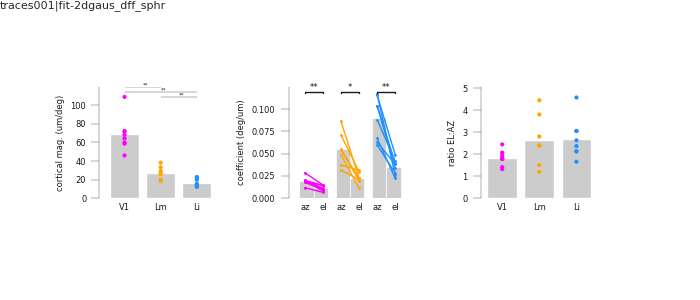

   t_stat  p_val visual_area
2     0.0  0.008          Li
   t_stat  p_val visual_area
1     0.0  0.016          Lm
   t_stat  p_val visual_area
0     0.0  0.008          V1
cortical_magnification_reliable_sphr_corrected
/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/scatter/sphr_corrected


In [117]:
%matplotlib notebook
sns.set(font_scale = 0.75, style='ticks')
pplot.set_plot_params()

s_=[]
fig, axn = pl.subplots(1,3, figsize=(7,3))
fig.patch.set_facecolor('w')

for ai, metric in enumerate(['um_per_deg', 'deg_per_um', 'ratio_el_to_az']):
    ax=axn[ai]
    if metric=='deg_per_um':
        ylim = (0, ymax+0.04)
        ax, stats_ = pplot.pairwise_compare_single_metric(regr_df, 
                         curr_metric='coefficient', ax=ax, size=1,
                         c1='az', c2='el', compare_var='cond', 
                         ttest=False, return_stats=True, bar_ci=None,
                         facecolor=[0.8]*3, edgecolor='w', label_areas=False)
        pplot.annotate_sig_on_paired_plot(ax, regr_df, stats_, 
                                          'coefficient', offset=0.001, h=0.001)
    else:
        ymax=round(cmag_df[metric].max(), 1) #0.2 if metric=='cortical_mag' else 5.5
        ylim = (0, ymax+0.04) if metric in ['deg_per_um'] else (0, ymax+(ymax/10.))
        pplot.stripplot_metric_by_area(cmag_df, metric, area_colors=area_colors,
                                    markersize=3, ax=ax,
                                    sig_fontsize=4, jitter=False, ylim=ylim,
                                    plot_means=True, y_loc=ymax-0.005, offset=ymax/20., #0.02,
                                    mean_style='bar', mean_type='mean', aspect=2)
        stats_ = pg.pairwise_ttests(dv=metric, between='visual_area', data=cmag_df,
                               subject='datakey', tail='one-sided', # use one-talied bec pos
                               padjust='fdr_bh', parametric=False)
    stats_['metric'] = metric
    s_.append(stats_)
    if metric=='ratio_el_to_az':
        ylabel='ratio EL:AZ'
    else:
        ylabel = 'coefficient (deg/um)' if metric=='deg_per_um' \
                        else 'cortical mag. (um/deg)'
    ax.set_ylabel(ylabel)
statsdf = pd.concat(s_)

for ax in axn:
    ax.tick_params(which='both', axis='x', size=0)
    ax.set_xlabel('')
    ax.set_box_aspect(1)
pl.subplots_adjust(left=0.15, right=0.85, bottom=0.2, top=0.85, wspace=0.7)
pplot.label_figure(fig, data_id)

figname = 'cortical_magnification_reliable_%s' % rf_str
print(figname)
pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
print(dst_dir)
pl.savefig(os.path.join(FIGDIR, '%s.svg' % figname))


In [118]:
221/2.89

76.47058823529412

In [119]:
190.03/6.23 

30.502407704654892

In [120]:
158.02/8.13

19.436654366543664

In [121]:
regr_df.head()

,R2,RMSE,pearson_p,pearson_r,coefficient,intercept,cond,aligned,visual_area,datakey,um_per_deg
0,0.996587,1.052717,0.0,0.998292,0.116990,-44.321214,az,True,Li,20190527_JC092_fov3,8.547751
1,0.997835,0.234689,0.0,0.998917,0.025573,-16.272389,el,True,Li,20190527_JC092_fov3,39.104102
0,0.981955,1.932185,0.0,0.990936,0.067490,-1.343422,az,True,Li,20190528_JC092_fov1,14.817075
1,0.994328,0.257566,0.0,0.997160,0.022140,-17.396730,el,True,Li,20190528_JC092_fov1,45.167842
0,0.966904,4.592534,0.0,0.983313,0.115708,-79.458143,az,True,Li,20190607_JC091_fov1,8.642425


In [122]:
mean_cmf = regr_df.groupby(['visual_area', 'cond'])['um_per_deg'].mean()\
                .reset_index().rename(columns={'cond': 'axis'})
mean_scatter = finaldf.groupby(['visual_area', 'axis'])\
                    [['deg_scatter', 'dist_scatter', 'std']].mean().reset_index()


In [123]:
means_= pd.merge(mean_cmf, mean_scatter, on=['visual_area', 'axis'] )
means_

,visual_area,axis,um_per_deg,deg_scatter,dist_scatter,std
0,Li,az,11.911293,9.065364,106.757635,15.040404
1,Li,el,30.704617,7.310388,193.591529,11.386221
2,Lm,az,20.196060,5.712073,106.433319,11.456345
3,Lm,el,49.085901,4.521871,211.760380,9.409236
4,V1,az,53.750557,5.626354,296.447444,9.012232
5,V1,el,97.227148,2.878690,289.423080,8.027176


In [124]:
means_['displacement'] = means_['dist_scatter']/means_['deg_scatter']
print(means_.round(2))


  visual_area axis  um_per_deg  deg_scatter  dist_scatter    std  displacement
0          Li   az       11.91         9.07        106.76  15.04         11.78
1          Li   el       30.70         7.31        193.59  11.39         26.48
2          Lm   az       20.20         5.71        106.43  11.46         18.63
3          Lm   el       49.09         4.52        211.76   9.41         46.83
4          V1   az       53.75         5.63        296.45   9.01         52.69
5          V1   el       97.23         2.88        289.42   8.03        100.54


<IPython.core.display.Javascript object>


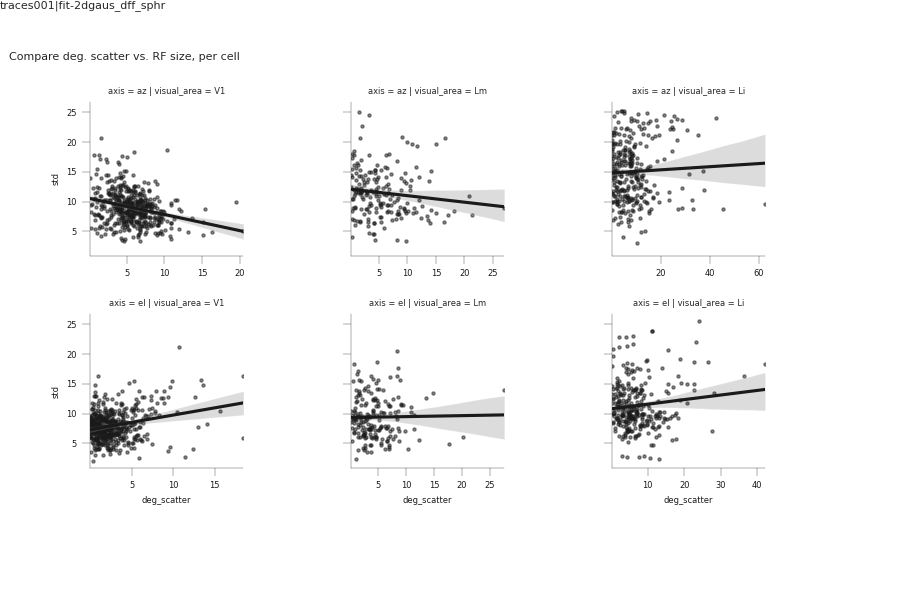

/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/scatter/sphr_corrected
/n/coxfs01/julianarhee/aggregate-visual-areas/receptive-fields/scatter/sphr_corrected single_cell_scatter_v_size_reliable


In [125]:
# df_ = finaldf[(finaldf.visual_area==va)].copy()
fg = sns.FacetGrid(finaldf, col='visual_area', col_order=visual_areas,
                  row='axis', sharex=False)
fg.map(sns.regplot, 'deg_scatter', 'std', scatter_kws=dict(s=5, alpha=0.5), 
      color='k')
for ax in fg.fig.axes:
    ax.set_box_aspect(1)

pl.subplots_adjust(left=0.1, right=0.85, bottom=0.2, top=0.85, wspace=0.7)
fg.fig.text(0.01, 0.9, 'Compare deg. scatter vs. RF size, per cell', fontsize=8)

pplot.label_figure(fg.fig, data_id)
figname = 'single_cell_scatter_v_size_reliable'
pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))
print(dst_dir)
pl.savefig(os.path.join(FIGDIR, '%s.svg' % figname))
print(dst_dir, figname)


# Check rfs-5 vs rfs-10

In [126]:
# Check all dsets that pass_regr (non-unique), PAIRED
min_ncells=5
scatter_pass = scatter_pass_regr[scatter_pass_regr['n_cells']>=min_ncells]

In [127]:
has_rfs5_andrfs10 = pd.concat([g for (va, dk), g \
                        in scatter_pass_regr.groupby(['visual_area', 'datakey'])
                        if 'rfs' in g['experiment'].values \
                               and 'rfs10' in g['experiment'].values])
has_both_counts =pd.concat([g for (va, dk), g in count_dev.groupby(['visual_area', 'datakey'])
                        if 'rfs' in g['experiment'].values \
                               and 'rfs10' in g['experiment'].values])

In [128]:
# sns.set(font_scale = 0.8)
pplot.set_plot_params()

<IPython.core.display.Javascript object>


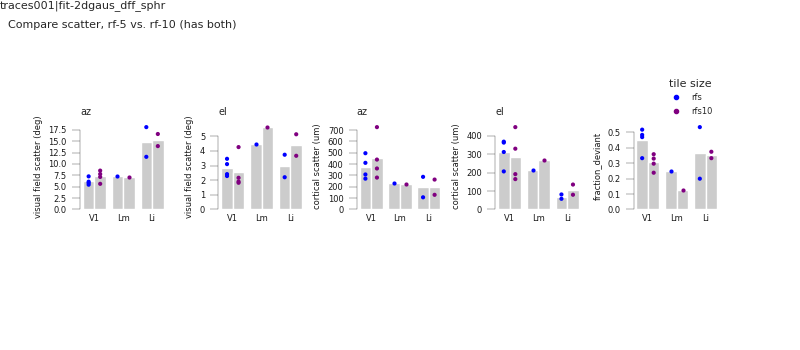

   t_stat  p_val visual_area
0     0.0  0.125          V1
1     0.0  1.000          Lm
2     1.0  1.000          Li


In [129]:
exp_colors = {'rfs': 'blue', 'rfs10': 'purple'}

plotd_exp = has_rfs5_andrfs10.groupby(['visual_area', 'datakey', 'axis', 'experiment'])\
                .mean().reset_index()
# print(plotd[['visual_area', 'datakey']]\
#       .drop_duplicates().groupby(['visual_area']).count()['datakey'].to_markdown())
stats_list=[]
fig, axn = pl.subplots(1,5, figsize=(8, 3.5))
fig.patch.set_facecolor('w')
ai=0
for mi, metric in enumerate(['deg_scatter', 'dist_scatter']):
    for ei, (exp, exp_df) in enumerate(plotd_exp.groupby('axis')):
        ax=axn[ai]
        ylabel = 'cortical scatter (um)' if metric=='dist_scatter' \
                    else 'visual field scatter (deg)'
        ax.set_title(exp, loc='left', fontsize=7)
        sns.barplot(x='visual_area', y=metric, data=exp_df, ax=ax,
                  order=visual_areas, hue='experiment', 
                    palette={'rfs': [0.8]*3, 'rfs10': [0.8]*3}, 
                    edgecolor='w', ci=None)
        sns.stripplot(x='visual_area', y=metric, data=exp_df, ax=ax,
                  order=visual_areas, hue='experiment', dodge=True,
                  jitter=False, size=3,
                  palette=exp_colors)
        ax.legend_.remove()
        ax.set_box_aspect(1)
        ax.set_ylabel(ylabel)
        if metric=='dist_scatter':
            offset=100; h=20;
            #ax.set_ylim([0, 550])
        else:
            #ax.set_ylim([0, 20])
            offset=10; h=.1;
        ai+=1
        try:
            stats_ = pstats.paired_ttests(exp_df, metric=metric, c1='rfs', c2='rfs10',
                                    compare_var='experiment', ttest=False)
            stats_['metric'] = metric
            stats_list.append(stats_)
            pplot.annotate_sig_on_paired_plot(ax, exp_df, stats_, 
                                              metric, offset=offset, h=h)
        except Exception as e:
            continue
statdf = pd.concat(stats_list, axis=0)
    
ax=axn[-1]
sns.stripplot(x='visual_area', y='fraction_deviant', data=has_both_counts, ax=ax,
              hue='experiment', palette=exp_colors, dodge=True, 
              order=visual_areas, jitter=False,size=3)
sns.barplot(x='visual_area', y='fraction_deviant', data=has_both_counts, ax=ax,
              hue='experiment', palette={'rfs': [0.8]*3, 'rfs10': [0.8]*3}, 
             edgecolor='w',ci=None, order=visual_areas)
pplot.crop_legend_labels(ax, 2,start_ix=0, bbox_to_anchor=(1, 1), loc='upper left',
        fontsize=6, title='tile size', markerscale=0.5)
stats_ = pstats.paired_ttests(has_both_counts, metric='fraction_deviant', 
                              c1='rfs', c2='rfs10',
                              compare_var='experiment', ttest=False)
# stats_['metric'] = metric
ax.set_box_aspect(1)
print(stats_)
pplot.annotate_sig_on_paired_plot(ax, has_both_counts, stats_, 'fraction_deviant', 
                                  offset=0.05, h=0.05)


pl.subplots_adjust(left=0.1, right=0.8, wspace=0.2, bottom=0.2, top=0.85)
sns.despine(bottom=True, trim=True)
for ax in axn.flat:
    ax.tick_params(which='both', axis='x', size=0)
    ax.set_xlabel('')  

# custom legend
leg_h = pplot.custom_legend_markers(colors=[exp_colors['rfs'], exp_colors['rfs10']],
                                   labels=['rfs', 'rfs10'],
                                   markers='o', lws=0)
axn[-1].legend(handles=leg_h, bbox_to_anchor=(1,1), frameon=False,
                    loc='lower right', fontsize=6, markerscale=0.5, title='tile size')

fig.text(0.01, 0.92, 'Compare scatter, rf-5 vs. rf-10 (has both)', fontsize=8)
pl.subplots_adjust(left=0.1, right=0.9, bottom=0.2, wspace=0.6)

pplot.label_figure(fig, data_id)

figname = 'scatter_compare_rf5-rf10_reliable_paired'
pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))

In [130]:
# Check all dsets that pass_regr (non-unique), UNAIRED
has_either = scatter_pass.copy()
has_either_counts = count_dev.copy()

<IPython.core.display.Javascript object>


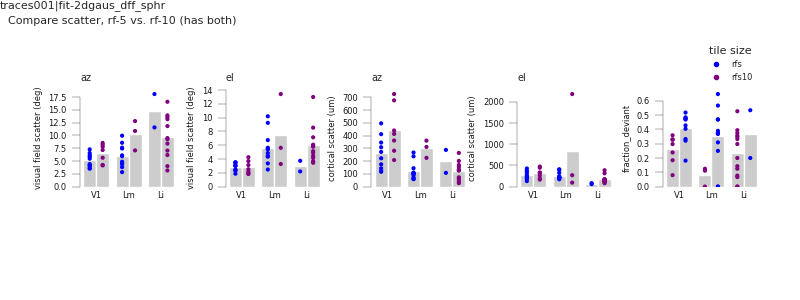

In [131]:
exp_colors = {'rfs': 'blue', 'rfs10': 'purple'}

plotd_exp = has_either.groupby(['visual_area', 'datakey', 'axis', 'experiment'])\
                .mean().reset_index()

fig, axn = pl.subplots(1,5, figsize=(8, 3))
fig.patch.set_facecolor('w')
ai=0
for mi, metric in enumerate(['deg_scatter', 'dist_scatter']):
    for ei, (exp, exp_df) in enumerate(plotd_exp.groupby('axis')):
        ax=axn[ai]
        ylabel = 'cortical scatter (um)' if metric=='dist_scatter' \
                    else 'visual field scatter (deg)'
        ax.set_title(exp, loc='left', fontsize=7)
        sns.barplot(x='visual_area', y=metric, data=exp_df, ax=ax,
                  order=visual_areas, hue='experiment', hue_order=['rfs', 'rfs10'],
                  palette={'rfs': [0.8]*3, 'rfs10': [0.8]*3}, 
                  edgecolor='w', ci=None)
        sns.stripplot(x='visual_area', y=metric, data=exp_df, ax=ax,
                  order=visual_areas, hue='experiment', hue_order=['rfs', 'rfs10'],
                  dodge=True, jitter=False, size=3,
                  palette=exp_colors)
        ax.legend_.remove()
        ax.set_box_aspect(1)
        ax.set_ylabel(ylabel)
        if metric=='dist_scatter':
            offset=100; h=20;
            #ax.set_ylim([0, 550])
        else:
            #ax.set_ylim([0, 20])
            offset=10; h=.1;
        ai+=1
    
ax=axn[-1]
sns.stripplot(x='visual_area', y='fraction_deviant', data=has_either_counts, ax=ax,
              hue='experiment', palette=exp_colors, dodge=True, 
              order=visual_areas, jitter=False,size=3)
sns.barplot(x='visual_area', y='fraction_deviant', data=has_either_counts, ax=ax,
              hue='experiment', palette={'rfs': [0.8]*3, 'rfs10': [0.8]*3}, 
             edgecolor='w',ci=None, order=visual_areas)
pplot.crop_legend_labels(ax, 2,start_ix=0, bbox_to_anchor=(1, 1), loc='upper left',
        fontsize=6, title='tile size', markerscale=0.5)

# stats_['metric'] = metric
ax.set_box_aspect(1)
# print(stats_)
# pplot.annotate_sig_on_paired_plot(ax, has_either_counts, stats_, 'fraction_deviant', 
#                                   offset=0.05, h=0.05)
sns.despine(bottom=True, trim=True)
for ax in axn.flat:
    ax.tick_params(which='both', axis='x', size=0)
    ax.set_xlabel('')  

# custom legend
leg_h = pplot.custom_legend_markers(colors=[exp_colors['rfs'], exp_colors['rfs10']],
                                   labels=['rfs', 'rfs10'],
                                   markers='o', lws=0)
axn[-1].legend(handles=leg_h, bbox_to_anchor=(1,1), frameon=False,
                    loc='lower right', fontsize=6, markerscale=0.5, title='tile size')

fig.text(0.01, 0.92, 'Compare scatter, rf-5 vs. rf-10 (has both)', fontsize=8)
pl.subplots_adjust(left=0.1, right=0.95, bottom=0.2, wspace=0.5)

pplot.label_figure(fig, data_id)

figname = 'scatter_compare_rf5-rf10_reliable_unpaired'
pl.savefig(os.path.join(dst_dir, '%s.svg' % figname))

In [63]:
# currd = has_either[has_either.inbounds]\
#             .groupby(['visual_area', 'datakey', 'axis', 'experiment'])\
#             .mean().reset_index()
    
# test = currd\
#     .groupby(['visual_area', 'datakey', 'axis', 'experiment']).mean().reset_index()
# test

plotd_exp = has_rfs5_andrfs10.groupby(['visual_area', 'datakey', 'axis', 'experiment'])\
                .mean().reset_index()

<IPython.core.display.Javascript object>


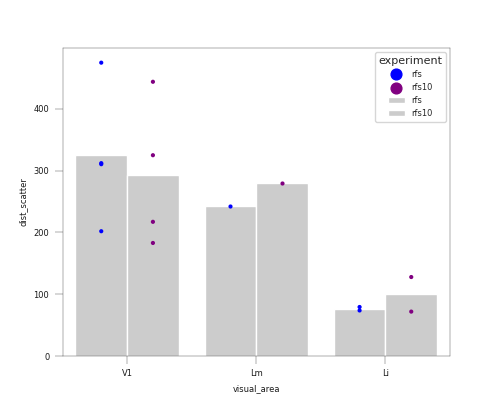

<AxesSubplot:xlabel='visual_area', ylabel='dist_scatter'>

In [64]:
fig, ax  = pl.subplots()
plotd = plotd_exp[plotd_exp.axis=='el']
sns.barplot(x='visual_area', y=metric, data=plotd, ax=ax,
          order=visual_areas, hue='experiment', hue_order=['rfs', 'rfs10'],
          palette={'rfs': [0.8]*3, 'rfs10': [0.8]*3}, 
          edgecolor='w', ci=None)
sns.stripplot(x='visual_area', y=metric, data=plotd, ax=ax,
          order=visual_areas, hue='experiment', hue_order=['rfs', 'rfs10'],
          dodge=True, jitter=False, size=3,
          palette=exp_colors)

In [68]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# #perform two-way ANOVA
# model = ols('deg_scatter ~ C(visual_area) + C(axis) + C(visual_area):C(axis)', \
#             data=plotd).fit()
# sm.stats.anova_lm(model, typ=2)
